In [1]:
from optimizer import Optimizer
from stockage import Stockage
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

*Module 2*
--------------------

# Outil d'optimisation de Gestion de stockage de Gaz Naturel

### 1. Load data


Text(0.5, 1.0, 'Cours du Gaz Naturel HH')

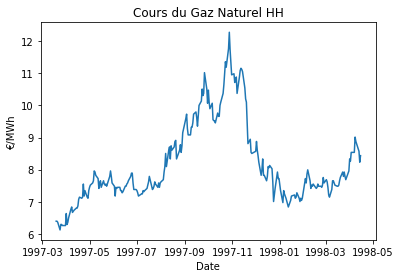

In [2]:
data =  pd.read_csv('spot_history_HH.csv')
data = data.iloc[50 :320]
data['Day'] = pd.to_datetime(data['Day'], format = '%Y-%m-%d')
plt.plot(data['Day'], data['Price'])
plt.ylabel('€/MWh')
plt.xlabel('Date')
plt.title('Cours du Gaz Naturel HH')

### 2. Create Stockage

In [3]:
X_0 = np.zeros( len(data['Day']))
stock = Stockage(100, 50, data, X_0)
print(stock)
print('Volume',stock.volume_end)
print('Threshold', stock.threshold_con)

Stockage de Gaz : 
 Type : generique 
 Volume max = 100 
  Volume initial = 50
 Temps d'évolutions = 270 jours 

Volume 50.0
Threshold {58: [0, 0.4], 100: [0.2, 0.65], 144: [0.5, 0.9], 164: [0, 0.95], 208: [0.85, 1]}


In [4]:
opti = Optimizer(stock)
opti.contraints_init()
opti.optimize()

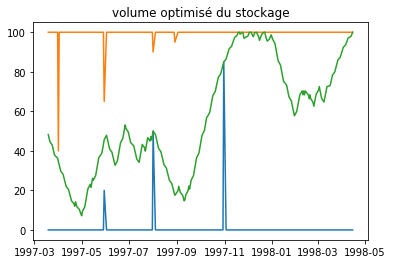

In [5]:
plt.title('volume optimisé du stockage')
stock.plot_threshold()
stock.plot_volume()


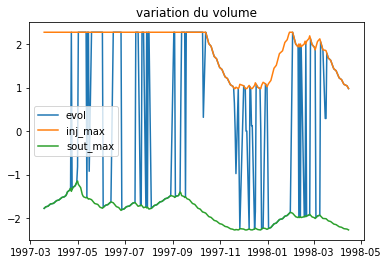

In [6]:
plt.title('variation du volume')
stock.plot_injection()
plt.legend()
plt.show()